## Insurance Claim Fraud Detection

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading Data

In [2]:
columns = [
    'months_as_customer',"age",'policy_number','policy_bind_date','policy_state',
    'policy_csl','policy_deductable','policy_annual_premium','umbrella_limit',
    'insured_zip','insured_sex','insured_education_level','insured_occupation',
    'insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date'
    ,'incident_type','collision_type','incident_severity','authorities_contacted','incident_state'
    ,'incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved',
    'property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount',
    'injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported'
]

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv",names=columns)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [5]:
df.shape

(1000, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Replacing ? with nan

In [7]:
df.replace("?",np.nan,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.isna().sum()/len(df) * 100

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage             

In [9]:
for i in ["collision_type","property_damage","police_report_available"]:
    print(i ,":",df[i].unique())

collision_type : ['Side Collision' nan 'Rear Collision' 'Front Collision']
property_damage : ['YES' nan 'NO']
police_report_available : ['YES' nan 'NO']


In [10]:
data = df.copy()

In [11]:
data.fillna("Not preset",inplace=True)

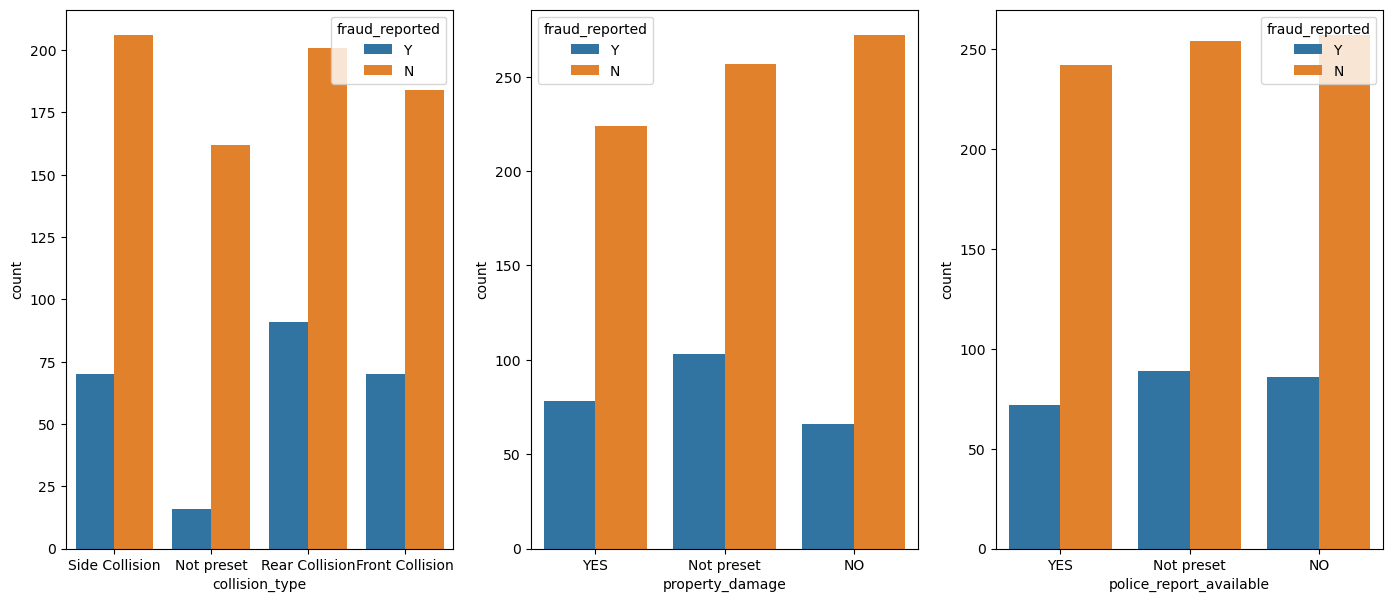

In [12]:
plt.figure(figsize=(17,7))
num = 1
for i in ["collision_type","property_damage","police_report_available"]:
    if num <=3:
        plt.subplot(1,3,num)
        sns.countplot(data=data,x=data[i],hue="fraud_reported")
        num+=1
plt.show()

 * Most of null value are fraud_reported as no that means null value are fraud **That's why we can not drop it**

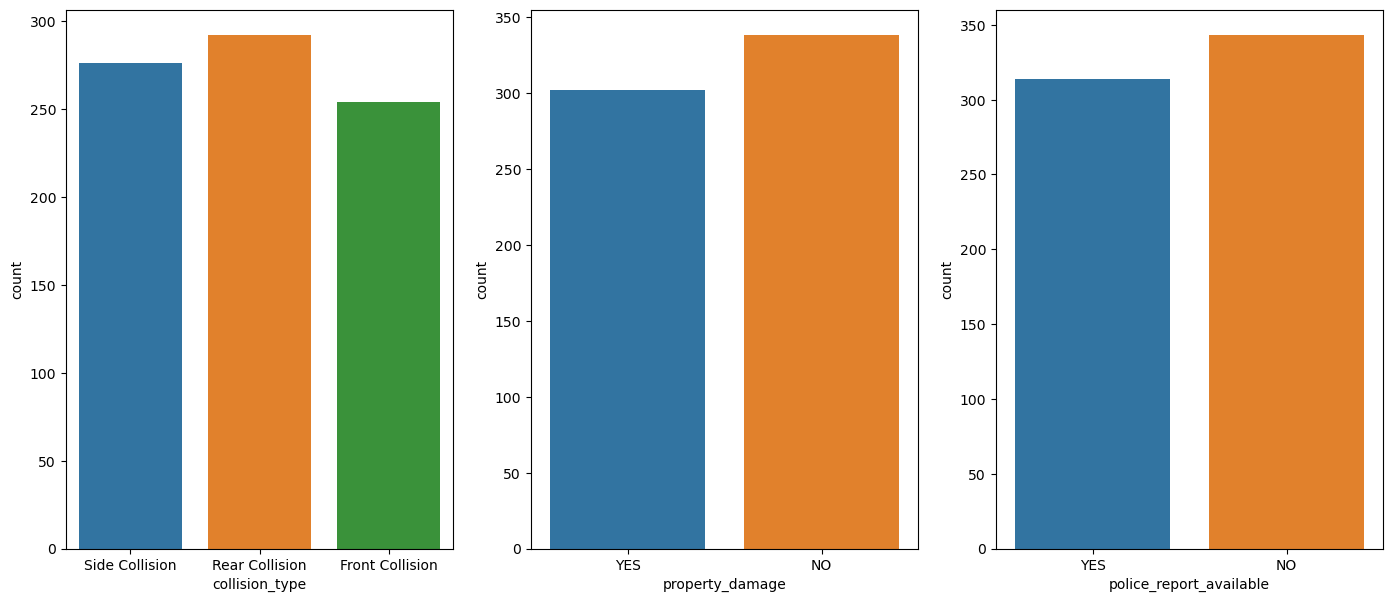

In [13]:
plt.figure(figsize=(17,7))
num = 1
for i in ["collision_type","property_damage","police_report_available"]:
    if num <=3:
        plt.subplot(1,3,num)
        sns.countplot(data=df,x=df[i])
        num+=1
plt.show()

###### Filling null value by mode

In [14]:
for i in ["collision_type","property_damage","police_report_available"]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [15]:
df.select_dtypes("O").nunique()

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                3
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               2
police_report_available       2
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

* incident_location have 1000 unique value that's not use full for prediction

In [16]:
df.drop("incident_location",axis=1,inplace=True)

**Feature engineering**

In [17]:
df["incident_date"].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

In [18]:
df["policy_Day"] = df["policy_bind_date"].str.split("-").str.get(0)
df["policy_Month"] = df["policy_bind_date"].str.split("-").str.get(1)
df["policy_Year"] = df["policy_bind_date"].str.split("-").str.get(2)

df["incident_Day"] = df["incident_date"].str.split("-").str.get(0)
df["incident_Month"] = df["incident_date"].str.split("-").str.get(1)

In [19]:
df["policy_Day"] = df["policy_Day"].astype(int)
df["policy_Month"] = df["policy_Month"].astype(int)
df["policy_Year"] =  df["policy_Year"].astype(int)
df["incident_Day"] = df["incident_Day"].astype(int)
df["incident_Month"] = df["incident_Month"].astype(int)

* policy_number is a unique value that is not use in prediction
* insured_zip is only a unique number we can drop it too

In [20]:
df.drop(["policy_bind_date","incident_date","policy_number","insured_zip"],axis=1,inplace=True)
df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,27,6,2006,21,1


In [21]:
col_obj = df.select_dtypes("O").columns.tolist()
col_int = df.select_dtypes(np.number).columns.tolist()

**Lebal Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in col_obj:
    df[i] = lb.fit_transform(df[i])

In [23]:
df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month
0,328,48,2,1,1000,1406.91,0,1,4,2,...,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,3510,8,12,2007,1,27,6,2006,21,1


In [24]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,...,37928.950000,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000,14.995000,1.496000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,...,18886.252893,4.034869,11.136107,6.015861,0.431483,8.808001,3.499824,7.360391,8.670995,0.523697
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,...,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,...,30292.500000,3.000000,10.000000,2000.000000,0.000000,8.000000,3.000000,1995.000000,7.750000,1.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,...,42100.000000,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.000000,1.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,...,50822.500000,10.000000,29.000000,2010.000000,0.000000,23.000000,10.000000,2008.000000,22.000000,2.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,...,79560.000000,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.000000,3.000000


1. umbrella_limit have min value as -1000000 this is like human error we have to fix it
2. Most of customer has 200 months policys
3. Most of porson of age is 39 also max age is 64 also min is 19 
4. policy_deductable have 75% and max value same 
5. incident_Year has only one value has 

In [25]:
df["umbrella_limit"].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [26]:
df["umbrella_limit"].replace(-1000000,1000000,inplace=True)

#### Vizualizinfng outliers

In [27]:
len(col_int)

21

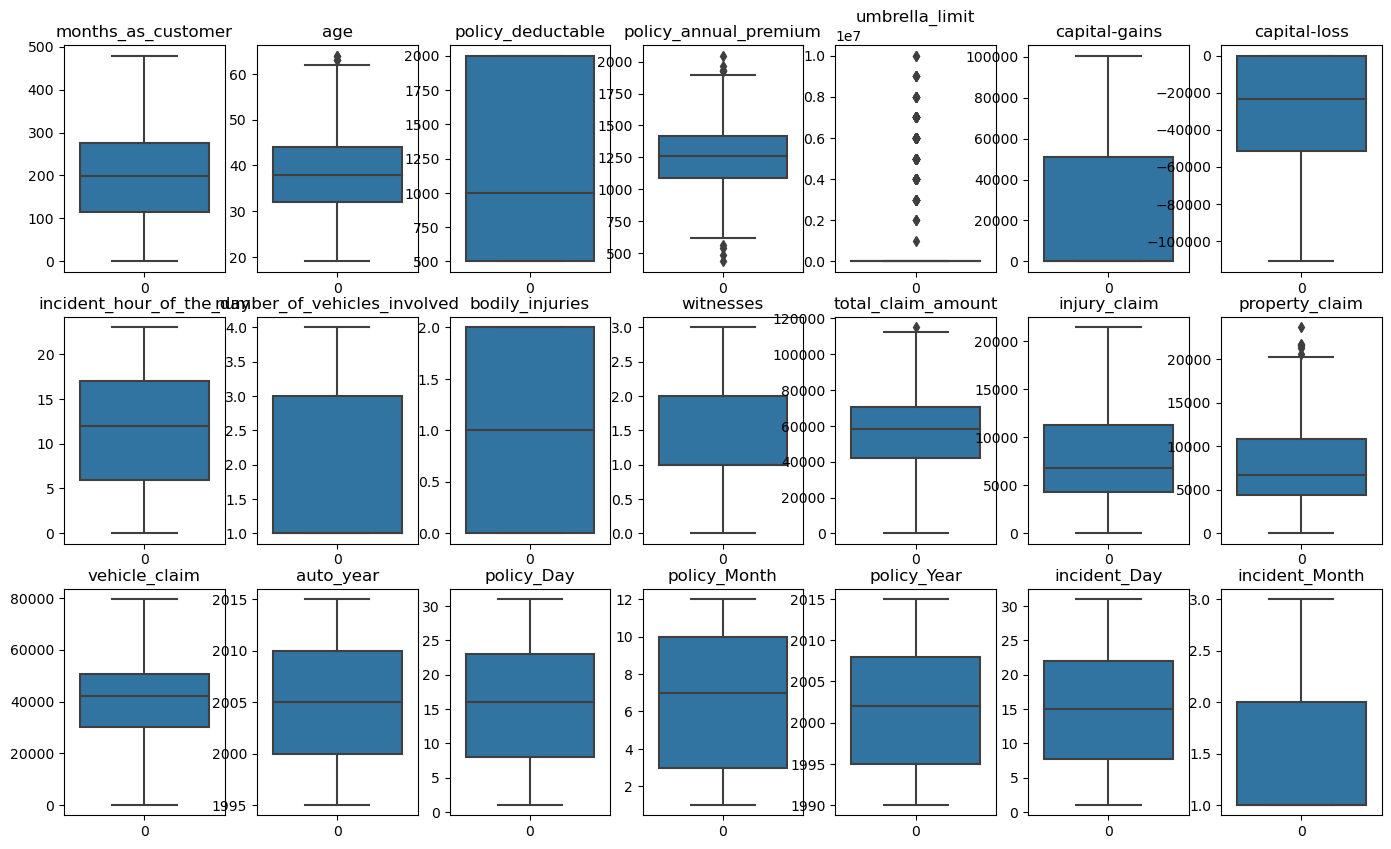

In [28]:
plt.figure(figsize=(17,10))
num = 1
for i in col_int:
    if num <=21:
        plt.subplot(3,7,num)
        sns.boxplot(df[i])
        plt.title(i)
        num+=1
plt.show()

In [29]:
### Removing outliers
from scipy.stats import zscore

z = np.abs(zscore(df))
z.head(3)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month
0,1.078140,0.990836,1.187173,0.060937,0.222383,0.616705,0.480548,1.076953,0.530931,1.158316,...,0.749653,0.856466,1.645743,0.183440,1.746019,0.176292,0.983684,1.684992,1.154424,0.947587
1,0.208995,0.334073,0.016856,0.060937,1.412784,0.242521,1.697819,1.076953,0.530931,0.162558,...,1.823346,0.360539,0.657470,0.315491,1.746019,1.312191,0.159802,0.597550,0.692885,0.947587
2,0.608002,1.088913,1.187173,1.182668,1.412784,0.642233,1.697819,0.928546,1.557877,1.082141,...,0.785565,0.631315,0.959702,0.315491,0.572731,1.073198,0.697813,0.218032,0.808270,0.962871


In [30]:
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 28,  6,  6,  6,  5, 13,
         6,  6,  6], dtype=int64))

In [31]:
print(z.iloc[31,6],z.iloc[48,6])

3.004839131753088 3.004839131753088


In [32]:
df = df[(z<3).all(axis=1)]
df.shape

(980, 39)

#### Vizualizinfng skewness

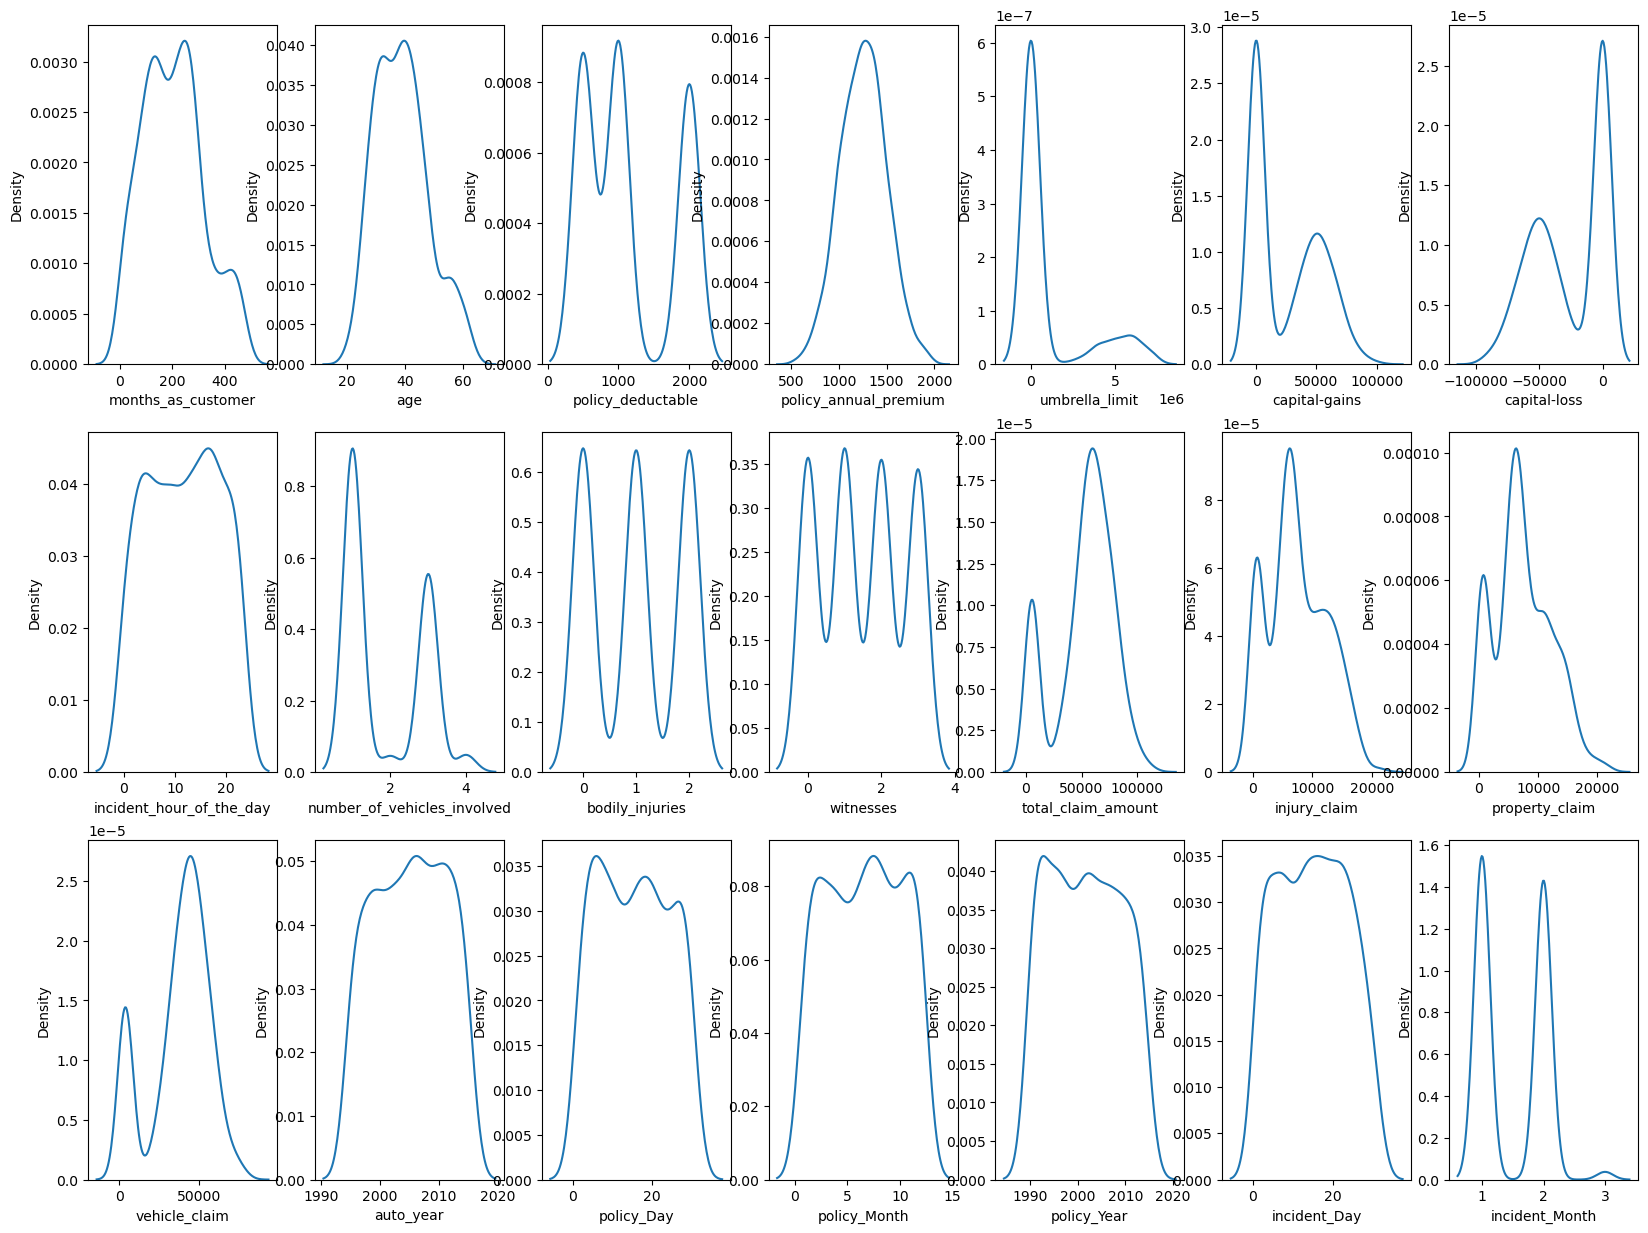

In [33]:
plt.figure(figsize=(20,15))
num = 1
for i in col_int:
    if num <=21:
        plt.subplot(3,7,num)
        sns.kdeplot(df[i])
        num+=1
plt.show()

* umbrella_limit ,capital-gains and capital-loss have skewness

In [34]:
for i in ["umbrella_limit","capital-gains"]:
    df[i] = np.sqrt(df[i])

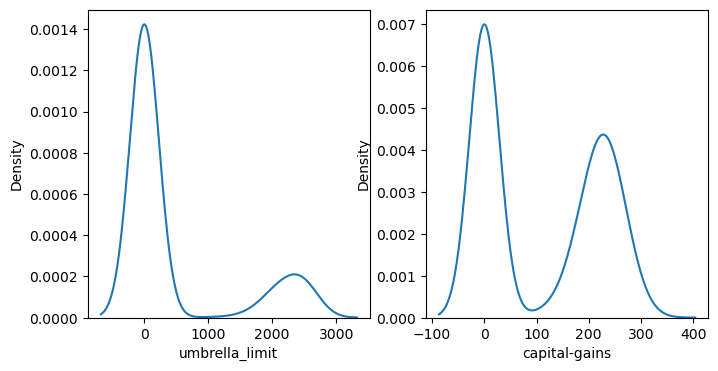

In [35]:
plt.figure(figsize=(8,4))
num = 1
for i in ["umbrella_limit","capital-gains"]:
    if num <=2:
        plt.subplot(1,2,num)
        sns.kdeplot(df[i])
        num+=1
plt.show()

<Axes: >

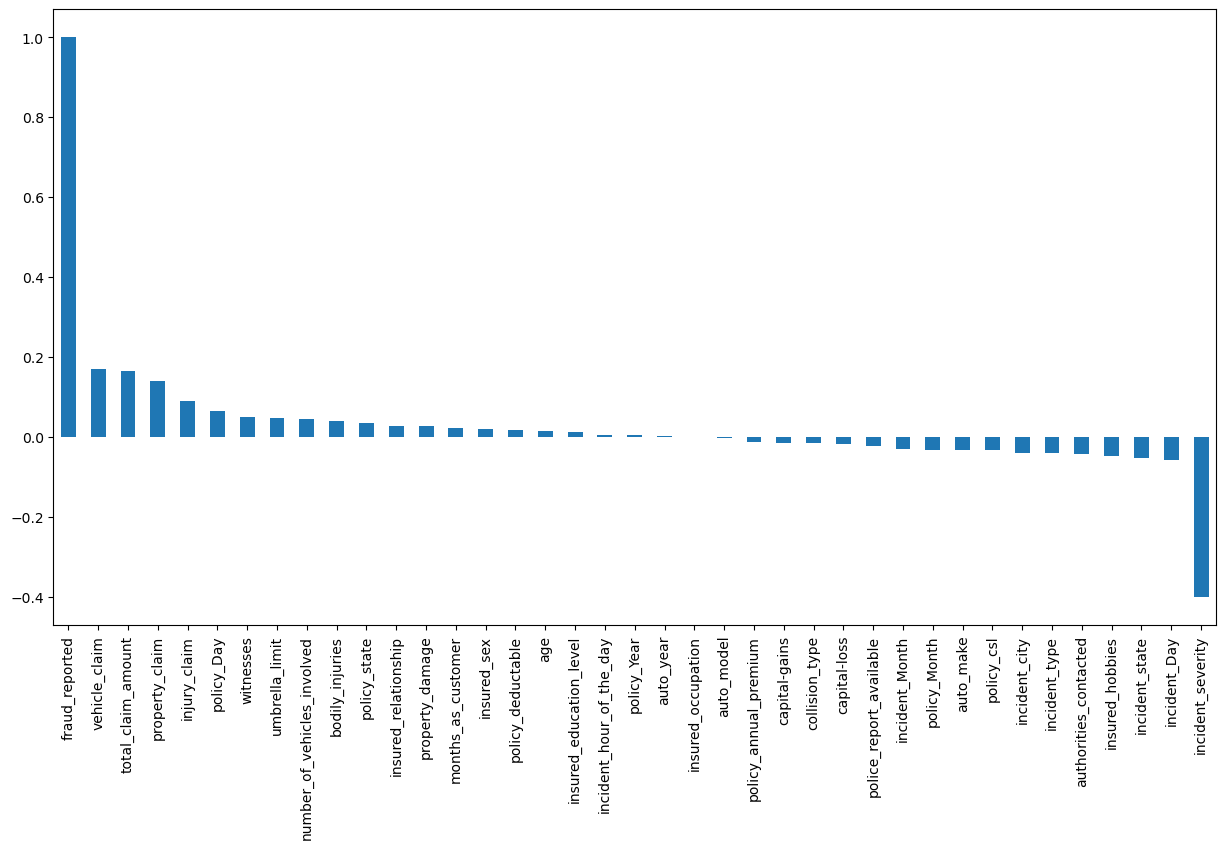

In [36]:
### Vizualizing which feature how correleted
plt.figure(figsize=(15,8))
corr = df.corr()["fraud_reported"].sort_values(ascending=[False])
corr.plot.bar()

<Axes: >

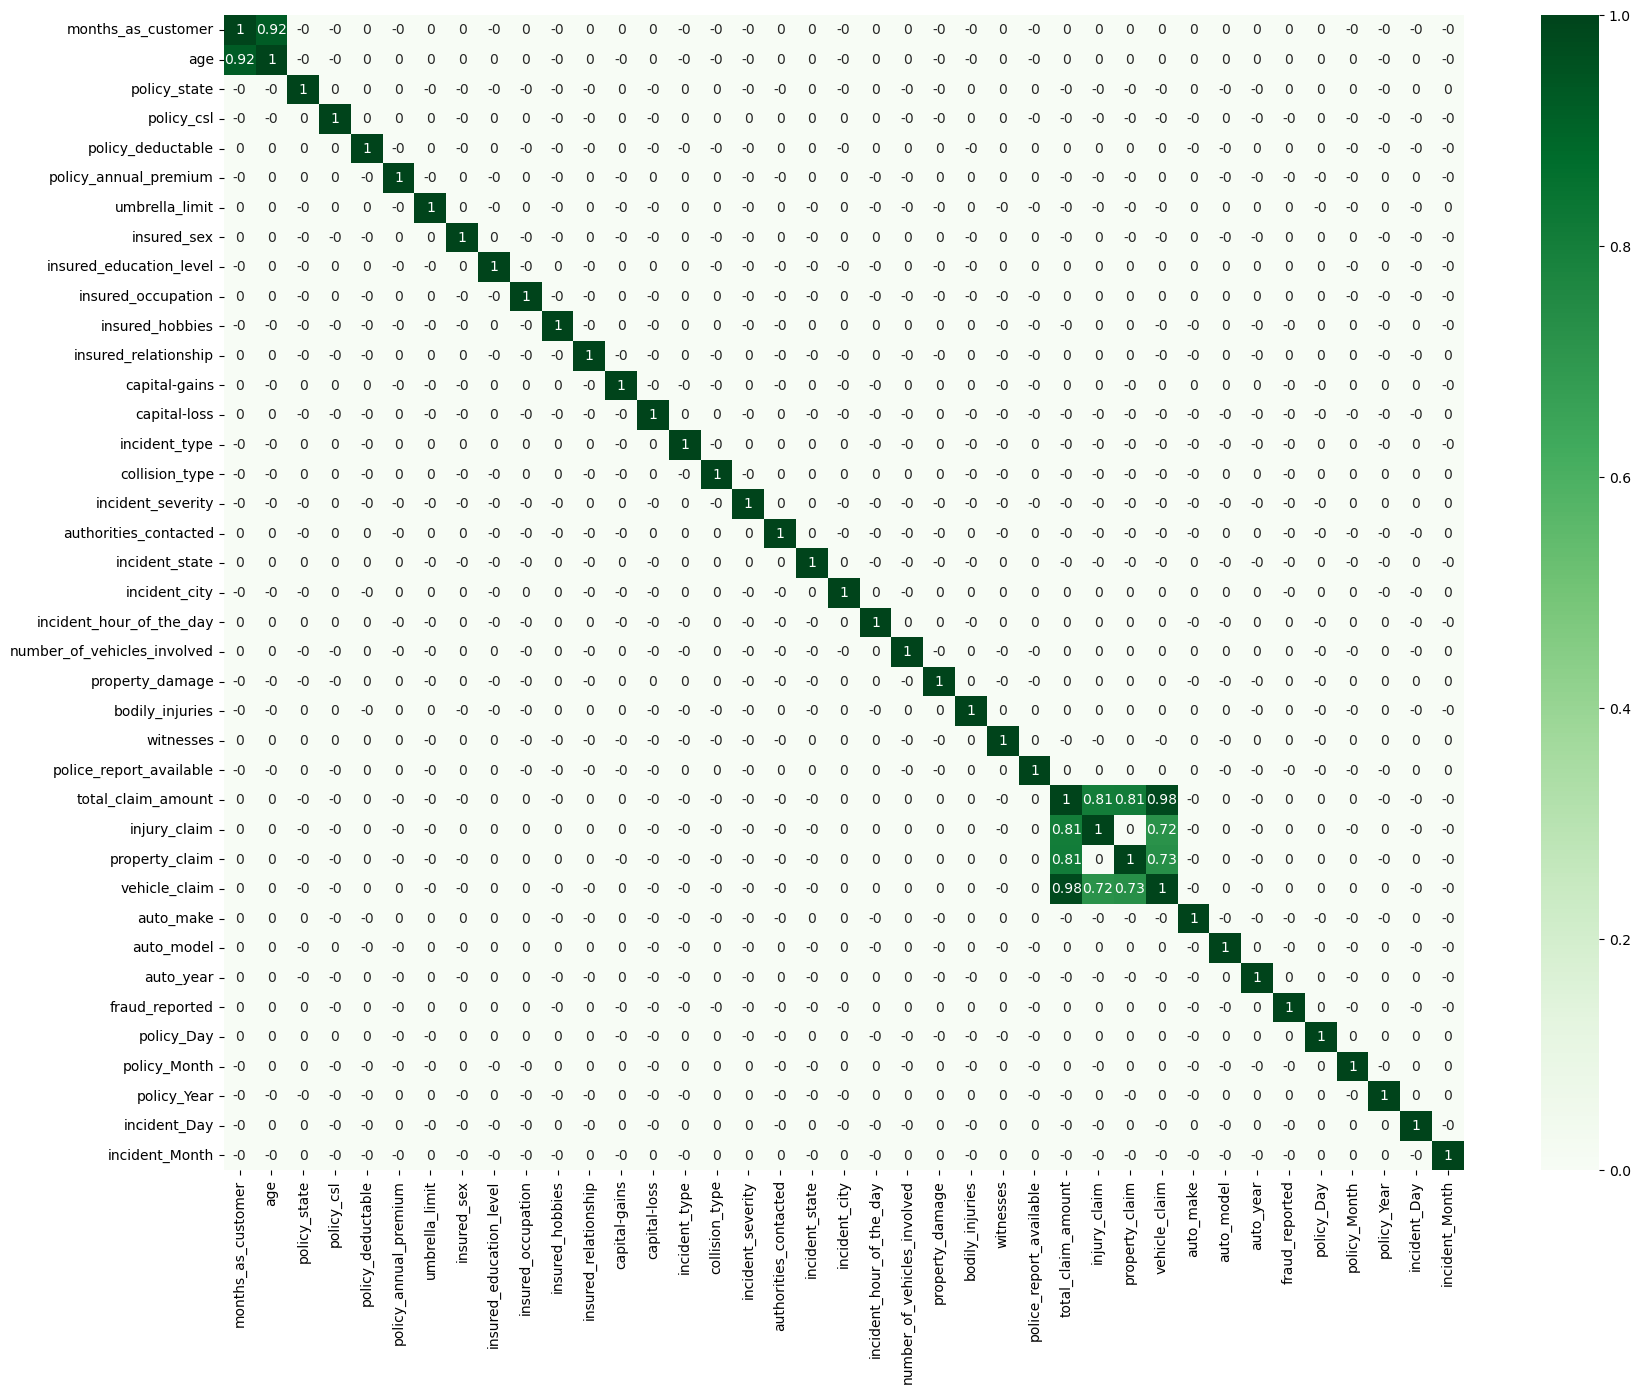

In [37]:
plt.figure(figsize=(20,15))
corr = (df.corr() > 0.6 )* df.corr()
sns.heatmap(corr,annot=True,cmap="Greens")

* total_claim_amount has strong correletion with ,injury_claim , property_claim and vehicle_claim 
* property_claim and vehicle_claim  have correletion 

* spliting data into input and target variable

In [38]:
x = df.drop("fraud_reported",axis=1)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_Day,policy_Month,policy_Year,incident_Day,incident_Month
0,328,48,2,1,1000,1406.91,0.000000,1,4,2,...,13020,52080,10,1,2004,17,10,2014,25,1
1,228,42,1,1,2000,1197.22,2236.067977,1,4,6,...,780,3510,8,12,2007,27,6,2006,21,1
2,134,29,2,0,2000,1413.14,2236.067977,0,6,11,...,3850,23100,4,30,2007,6,9,2000,22,2
3,256,41,0,1,2000,1415.74,2449.489743,0,6,1,...,6340,50720,3,34,2014,25,5,1990,10,1
4,228,44,0,2,1000,1583.91,2449.489743,1,0,11,...,650,4550,0,31,2009,6,6,2014,17,2


In [39]:
y = df.loc[:,"fraud_reported"]
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

#### Removing multicoliniarity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif["columns"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return vif

In [41]:
vif(x)

,columns,VIF
0,months_as_customer,2.867628e+01
1,age,1.317647e+02
2,policy_state,2.587660e+00
3,policy_csl,2.446679e+00
4,policy_deductable,4.666995e+00
5,policy_annual_premium,2.916874e+01
6,umbrella_limit,1.282426e+00
7,insured_sex,1.917300e+00
8,insured_education_level,3.464521e+00
9,insured_occupation,3.796091e+00


In [42]:
x.drop(["total_claim_amount"],axis=1,inplace=True)
vif(x)

,columns,VIF
0,months_as_customer,28.676284
1,age,131.764664
2,policy_state,2.587660
3,policy_csl,2.446679
4,policy_deductable,4.666995
5,policy_annual_premium,29.168736
6,umbrella_limit,1.282426
7,insured_sex,1.917300
8,insured_education_level,3.464521
9,insured_occupation,3.796091


In [43]:
x.drop(["policy_Year","auto_year"],axis=1,inplace=True)
vif(x)

,columns,VIF
0,months_as_customer,24.422293
1,age,102.919629
2,policy_state,2.560292
3,policy_csl,2.436224
4,policy_deductable,4.554867
5,policy_annual_premium,25.321743
6,umbrella_limit,1.275985
7,insured_sex,1.917295
8,insured_education_level,3.415892
9,insured_occupation,3.734198


#### Feature selection

In [44]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

In [45]:
feature_sel_model = SelectFromModel(Ridge(alpha=0.001,random_state=0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Ridge(alpha=0.001, random_state=0))

In [46]:
feature_sel_model.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False,  True])

In [47]:
selected_feat = x.columns[(feature_sel_model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 35
feature selected: 8


In [48]:
selected_feat

Index(['policy_state', 'policy_csl', 'incident_severity', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'incident_Month'],
      dtype='object')

In [49]:
x = x[selected_feat]
x.head()

,policy_state,policy_csl,incident_severity,property_damage,bodily_injuries,witnesses,police_report_available,incident_Month
0,2,1,0,1,1,2,1,1
1,1,1,1,0,0,0,0,1
2,2,0,1,0,2,3,0,2
3,0,1,0,0,1,2,0,1
4,0,2,1,0,0,1,0,2


In [50]:
col = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_annual_premium', 'umbrella_limit', 'insured_education_level',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'incident_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       'policy_Day', 'policy_Month', 'policy_Year', 'incident_Day',
       'incident_Month',"fraud_reported"]

#### splting data into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
print("x_train:",x_train.shape,"|","y_train:",y_train.shape)
print("x_test:",x_test.shape,"|","y_test:",y_test.shape)
print(y_train.value_counts())

x_train: (784, 8) | y_train: (784,)
x_test: (196, 8) | y_test: (196,)
0    595
1    189
Name: fraud_reported, dtype: int64


In [54]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train,y_train = smt.fit_resample(x_train,y_train)

In [55]:
y_train.value_counts()

0    595
1    595
Name: fraud_reported, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler
smt = StandardScaler()
x_train = smt.fit_transform(x_train)

### Model Building

#### LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [58]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [60]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.7764705882352941

confusion_matrix:
 [[445 150]
 [116 479]]

classification_report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       595
           1       0.76      0.81      0.78       595

    accuracy                           0.78      1190
   macro avg       0.78      0.78      0.78      1190
weighted avg       0.78      0.78      0.78      1190

<-------------------test------------------------->
accuracy_score: 0.7397959183673469

confusion_matrix:
 [[145   0]
 [ 51   0]]

classification_report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       145
           1       0.00      0.00      0.00        51

    accuracy                           0.74       196
   macro avg       0.37      0.50      0.43       196
weighted avg       0.55      0.74      0.63       196



#### knn

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [64]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.8495798319327731

confusion_matrix:
 [[482 113]
 [ 66 529]]

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       595
           1       0.82      0.89      0.86       595

    accuracy                           0.85      1190
   macro avg       0.85      0.85      0.85      1190
weighted avg       0.85      0.85      0.85      1190

<-------------------test------------------------->
accuracy_score: 0.7295918367346939

confusion_matrix:
 [[133  12]
 [ 41  10]]

classification_report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       145
           1       0.45      0.20      0.27        51

    accuracy                           0.73       196
   macro avg       0.61      0.56      0.55       196
weighted avg       0.68      0.73      0.69       196



#### svc

In [65]:
from sklearn.svm import SVC

In [66]:
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [67]:
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [68]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.8378151260504202

confusion_matrix:
 [[500  95]
 [ 98 497]]

classification_report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       595
           1       0.84      0.84      0.84       595

    accuracy                           0.84      1190
   macro avg       0.84      0.84      0.84      1190
weighted avg       0.84      0.84      0.84      1190

<-------------------test------------------------->
accuracy_score: 0.7397959183673469

confusion_matrix:
 [[145   0]
 [ 51   0]]

classification_report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       145
           1       0.00      0.00      0.00        51

    accuracy                           0.74       196
   macro avg       0.37      0.50      0.43       196
weighted avg       0.55      0.74      0.63       196



#### RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [72]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.9537815126050421

confusion_matrix:
 [[553  42]
 [ 13 582]]

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       595
           1       0.93      0.98      0.95       595

    accuracy                           0.95      1190
   macro avg       0.95      0.95      0.95      1190
weighted avg       0.95      0.95      0.95      1190

<-------------------test------------------------->
accuracy_score: 0.7142857142857143

confusion_matrix:
 [[138   7]
 [ 49   2]]

classification_report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       145
           1       0.22      0.04      0.07        51

    accuracy                           0.71       196
   macro avg       0.48      0.50      0.45       196
weighted avg       0.60      0.71      0.63       196



#### AdaBoostClassifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [75]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [76]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.7907563025210084

confusion_matrix:
 [[507  88]
 [161 434]]

classification_report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       595
           1       0.83      0.73      0.78       595

    accuracy                           0.79      1190
   macro avg       0.80      0.79      0.79      1190
weighted avg       0.80      0.79      0.79      1190

<-------------------test------------------------->
accuracy_score: 0.7397959183673469

confusion_matrix:
 [[145   0]
 [ 51   0]]

classification_report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       145
           1       0.00      0.00      0.00        51

    accuracy                           0.74       196
   macro avg       0.37      0.50      0.43       196
weighted avg       0.55      0.74      0.63       196



#### GradientBoostingClassifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [79]:
y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

In [80]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.838655462184874

confusion_matrix:
 [[508  87]
 [105 490]]

classification_report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       595
           1       0.85      0.82      0.84       595

    accuracy                           0.84      1190
   macro avg       0.84      0.84      0.84      1190
weighted avg       0.84      0.84      0.84      1190

<-------------------test------------------------->
accuracy_score: 0.7397959183673469

confusion_matrix:
 [[145   0]
 [ 51   0]]

classification_report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       145
           1       0.00      0.00      0.00        51

    accuracy                           0.74       196
   macro avg       0.37      0.50      0.43       196
weighted avg       0.55      0.74      0.63       196



#### XGBOOSTClassifier

In [81]:
from xgboost import XGBClassifier

In [82]:
xgc = XGBClassifier()
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
y_train_pred = xgc.predict(x_train)
y_test_pred = xgc.predict(x_test)

In [84]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.9478991596638655

confusion_matrix:
 [[552  43]
 [ 19 576]]

classification_report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       595
           1       0.93      0.97      0.95       595

    accuracy                           0.95      1190
   macro avg       0.95      0.95      0.95      1190
weighted avg       0.95      0.95      0.95      1190

<-------------------test------------------------->
accuracy_score: 0.7091836734693877

confusion_matrix:
 [[114  31]
 [ 26  25]]

classification_report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       145
           1       0.45      0.49      0.47        51

    accuracy                           0.71       196
   macro avg       0.63      0.64      0.63       196
weighted avg       0.72      0.71      0.71       196



#### Final Model

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param = {
    "algorithm" : ["SAMME", "SAMME.R"],
    "learning_rate" : [0.01,0.1,1],
    "n_estimators" : [100,500,800,1000],
    "random_state" : [40,42,44,46]
}

In [87]:
ada_cv = GridSearchCV(estimator=ada,param_grid=param,cv=5,scoring="f1",verbose=1)
ada_cv.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [100, 500, 800, 1000],
                         'random_state': [40, 42, 44, 46]},
             scoring='f1', verbose=1)

In [88]:
print(ada_cv.best_params_)
print(ada_cv.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 1000, 'random_state': 40}
0.7785676663588315


#### Saving Model

In [89]:
import joblib

In [90]:
joblib.dump(ada_cv,"Insurence_claim.obj")

['Insurence_claim.obj']

In [91]:
Insurence_claim = joblib.load("Insurence_claim.obj")

#### Prediction

In [92]:
y_train_pred = Insurence_claim.predict(x_train)
y_test_pred = Insurence_claim.predict(x_test)

In [93]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.7932773109243697

confusion_matrix:
 [[511  84]
 [162 433]]

classification_report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       595
           1       0.84      0.73      0.78       595

    accuracy                           0.79      1190
   macro avg       0.80      0.79      0.79      1190
weighted avg       0.80      0.79      0.79      1190

<-------------------test------------------------->
accuracy_score: 0.7397959183673469

confusion_matrix:
 [[145   0]
 [ 51   0]]

classification_report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       145
           1       0.00      0.00      0.00        51

    accuracy                           0.74       196
   macro avg       0.37      0.50      0.43       196
weighted avg       0.55      0.74      0.63       196

